# 1) Binary search tree (BST)

- BST umoznuje rychle udrziavat zatriedene pole cisel (maintain a sorted list of numbers)
- kazdy uzol ma max. 2 "child" uzly
- rozdiel medzi obycajnym binary tree:
    1. vsetky uzly v lavom sub-strome maju hodnoty **mensie** ako "root" uzol
    2. vsetky uzly v pravom sub-strome maju hodnoty **vacsie** ako "root" uzol
    3. oba sub-stromy kazdeho uzla su tiez BST, cize maju predchadzajuce 2 vlastnosti

    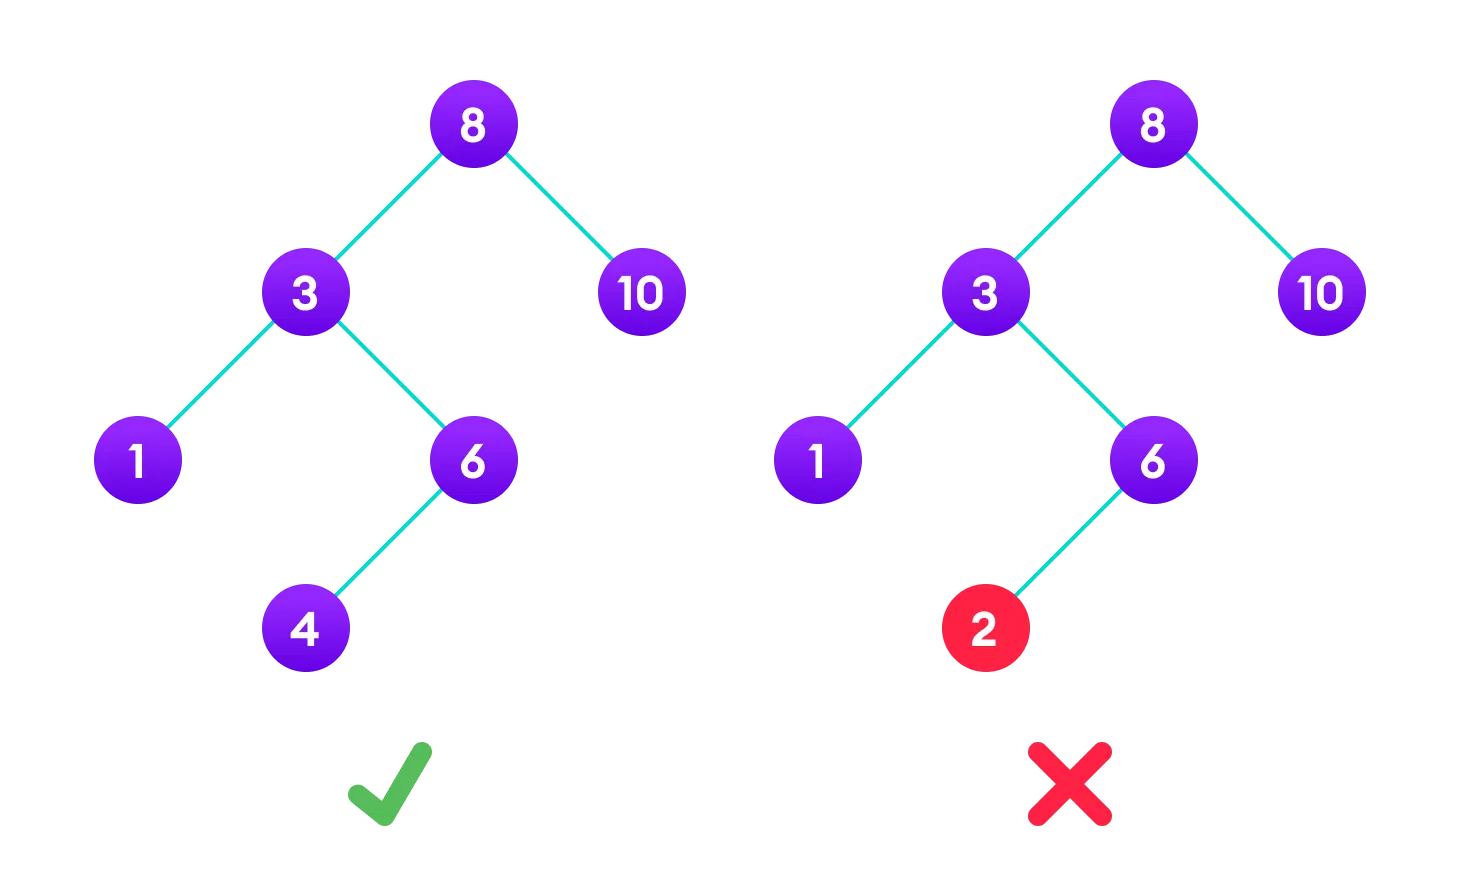
    
    - obr. vpravo nie je BTS, pretoze pravy sub-strom uzla "3" ma aj mensi hodnotu (uzol "2")

- operations:
    - search
    - insert
    - delete
- komplexnost:
    - casova (time complexity): best = O(log n), worst= O(n)
        - n - v tomto pripade je pocet uzlov v strome
    - priestorova (space copmplexity): 0(n)
    
- aplikacie:
    - multilevel indexovanie v databaze
    - dynamicke triedenie

## 1.1) Search

- zavisi na vlastnostiach BTS, ze lavy sub-strom ma hodnoty mensie ako root a pravy sub-strom ma hodnoty vacsie ako root
- cize ak hladana hodnota je mensia ako root, prehladavem iba lavy sub-strom ak je vacsia, prehladavm pravy sub-strom
- priklad, hladam "4":
    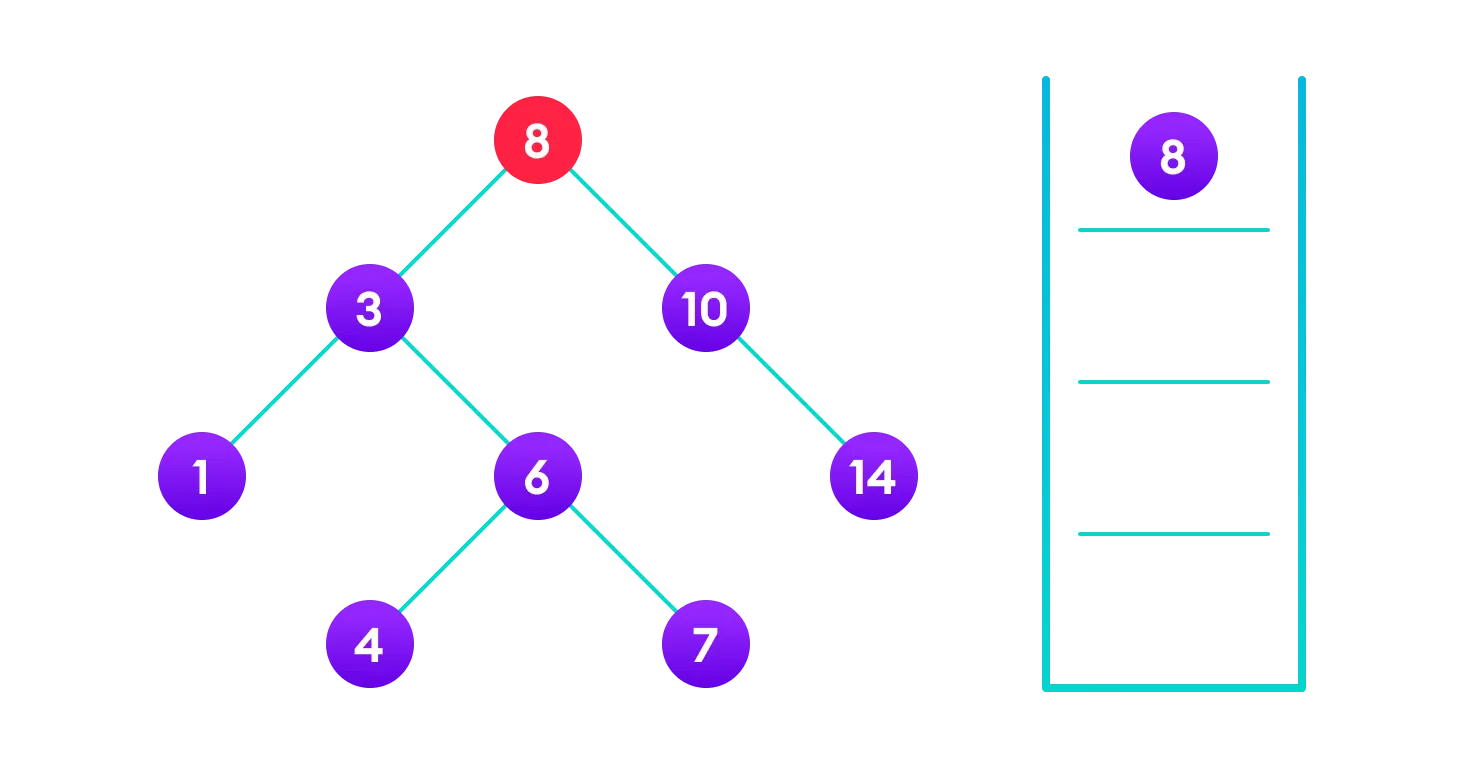
    - 4 som nenasiel, je menej ako 8, cize hladam v lavom sub-strome uzla 8

    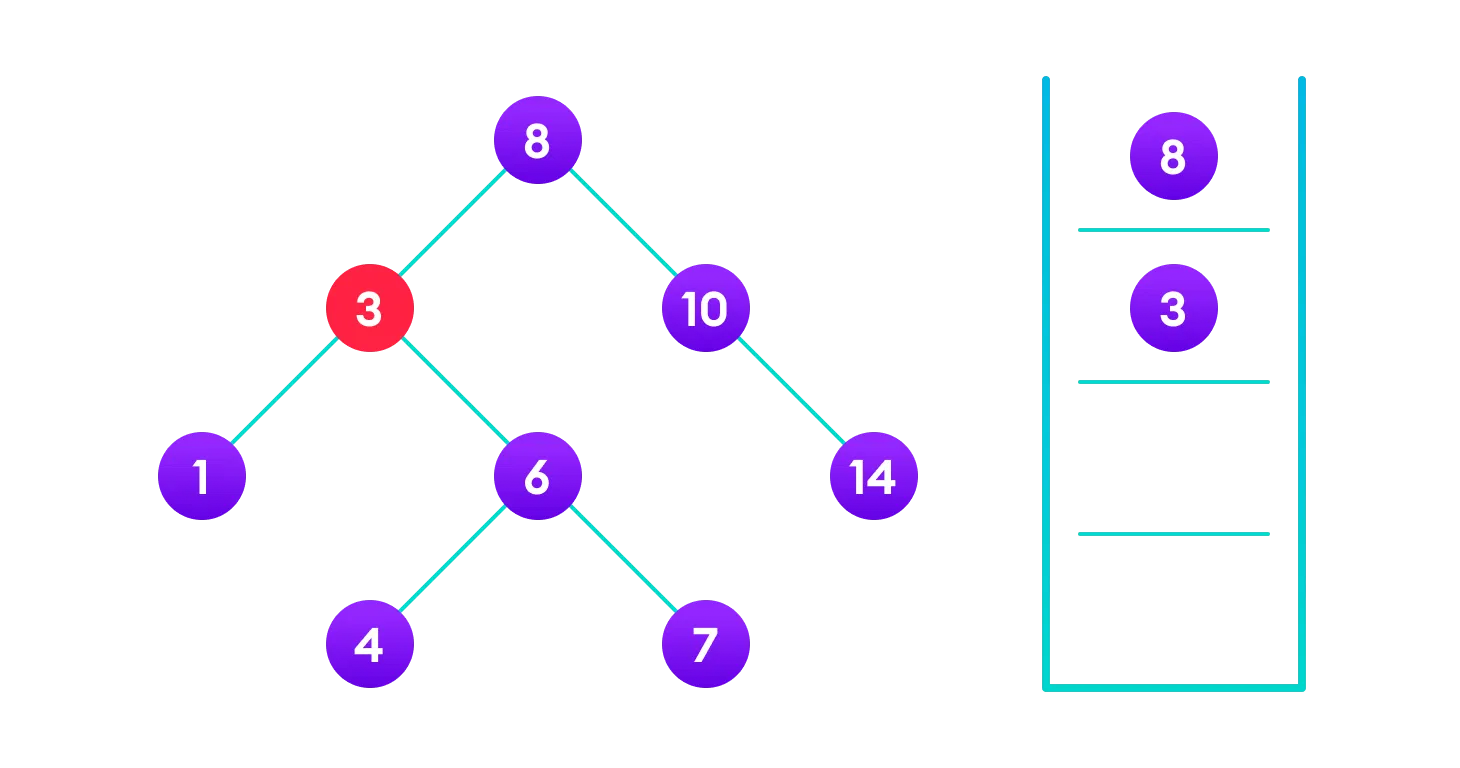
    - 4 som nenasiel, je viac ako uzol "3", cize hladam v pravom sub-strome uzla "3"

    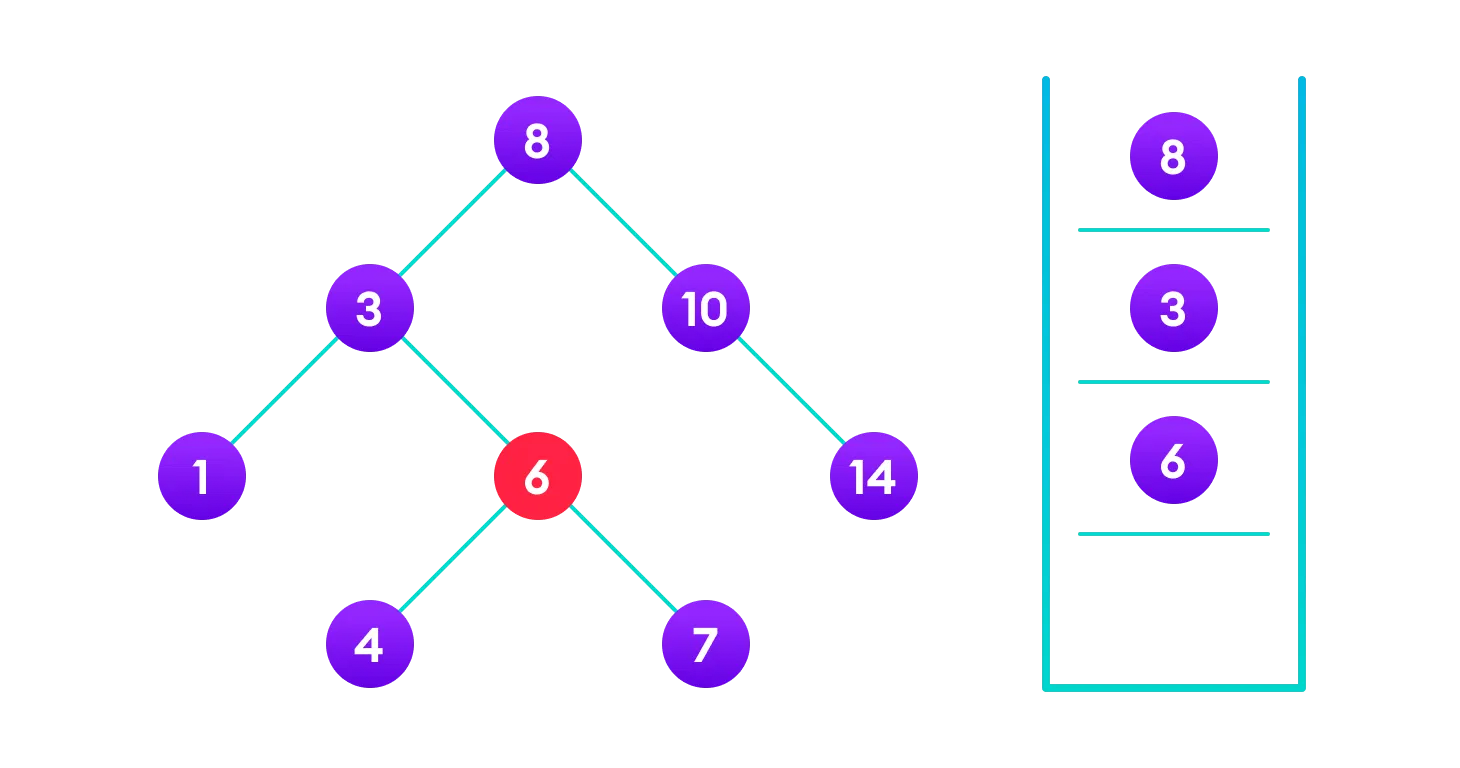
    - 4 som nenasiel, je menej ako 6, cize hladam v lavom sub-strome uzla "6"

    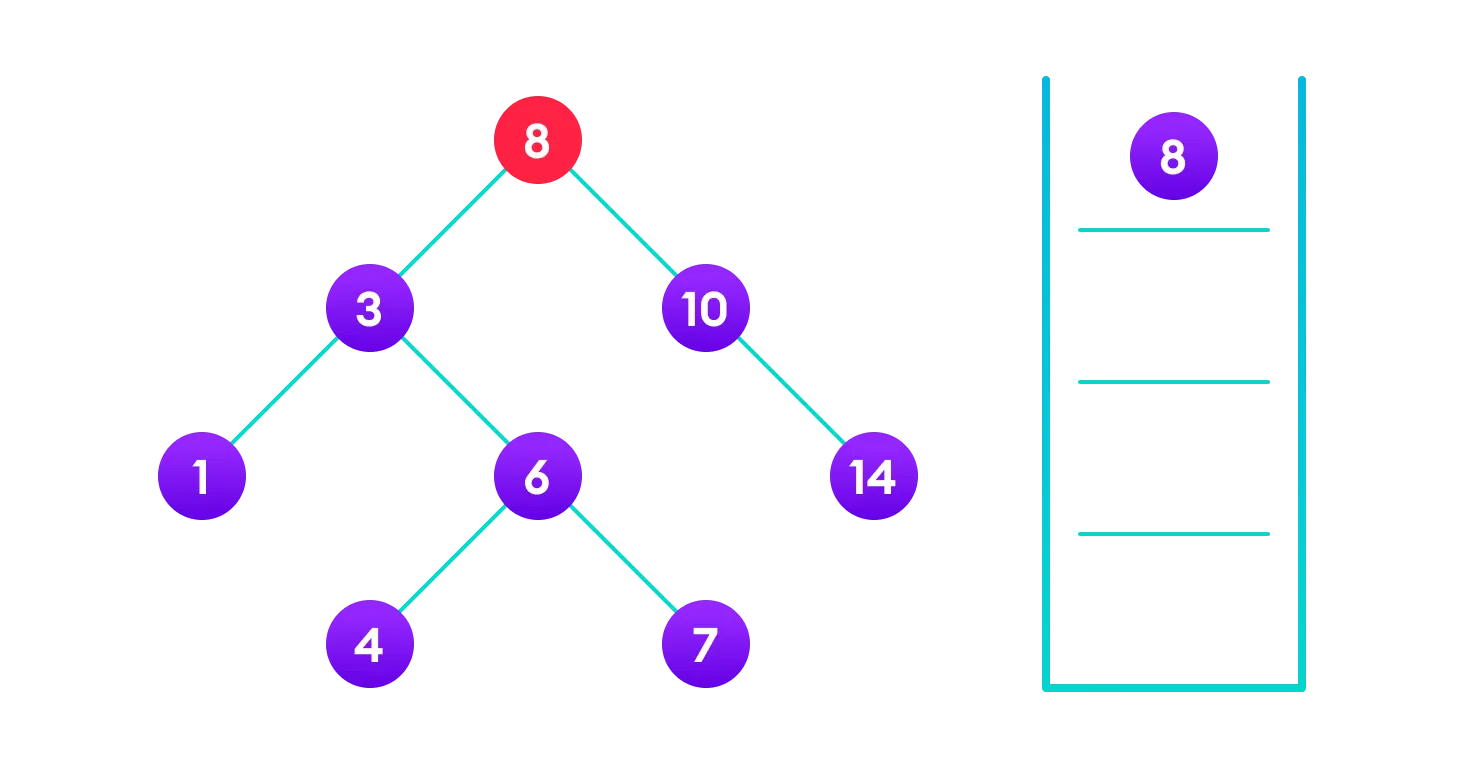
    - 4 som nasiel
- ak hodnotu najdem, tak ju vratim, aby sa sirila v kazdom kroku rekurzie
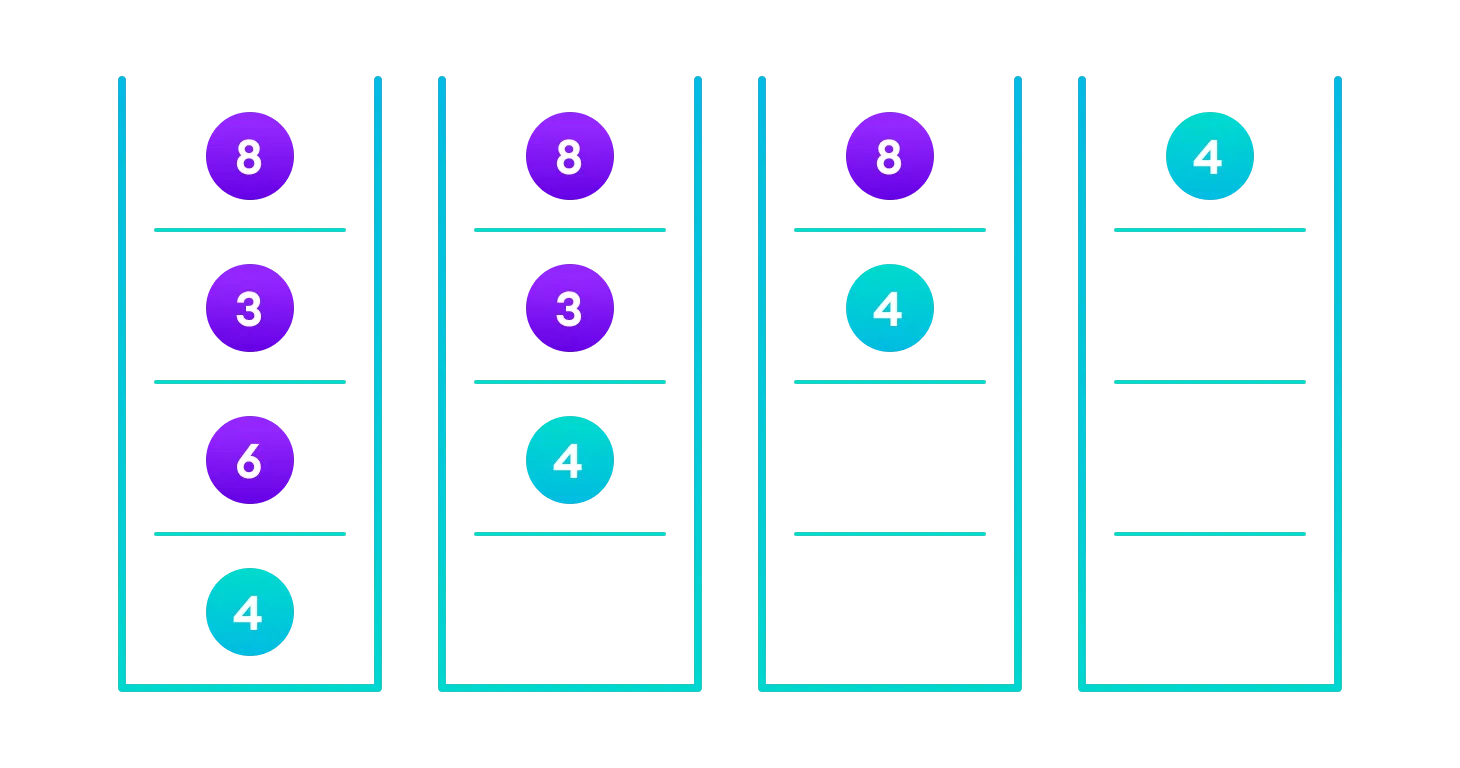 

- ak sa hodnta nenajde, tak nakoniec dojdem k bodu kedy lavy alebo pravy sub-strom uz nema ziaden "child" uzol.


## 1.2) Insert

- podobne "search"
- priklad, chcem vlozit "4":
    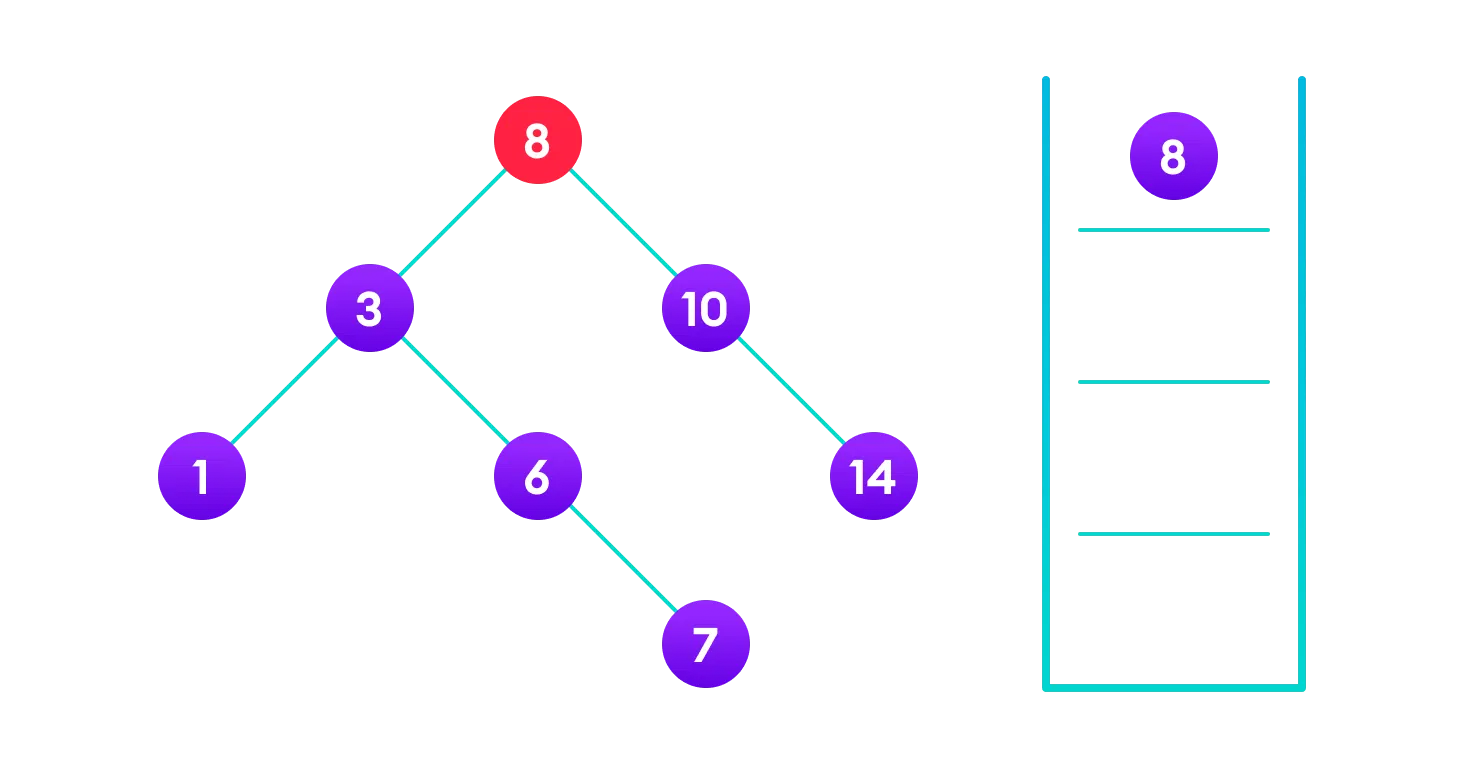
    - 4 < 8, pokracujem v lavom sub-strome uzla "8"

    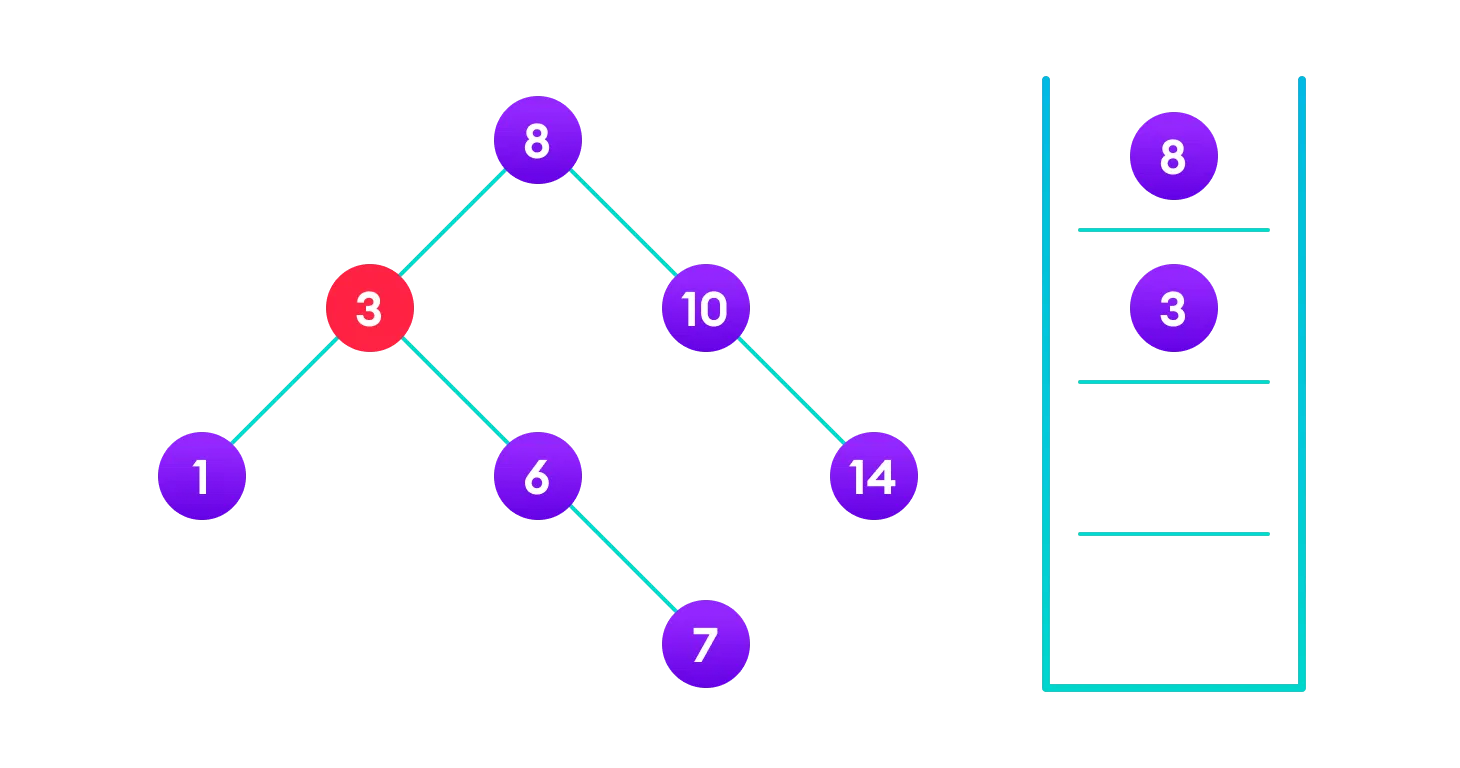
    - 4 > 3, pokracujem v pravom sub-strome uzla "3"

    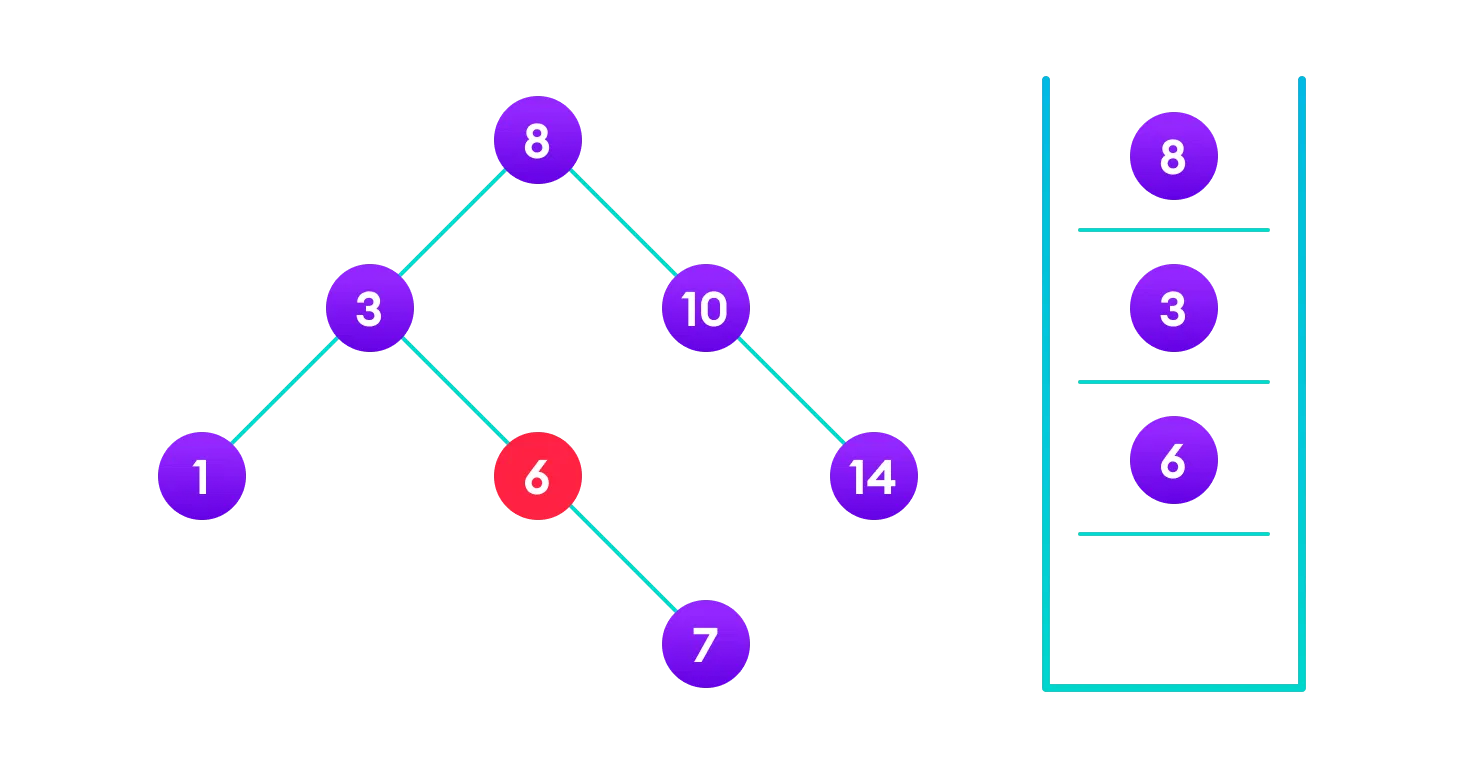
    - 4 < 6, pokracujem v lavom sub-strome uzla "6", tam uz nie je ziaden uzol, takze vlazim uzol "4"

    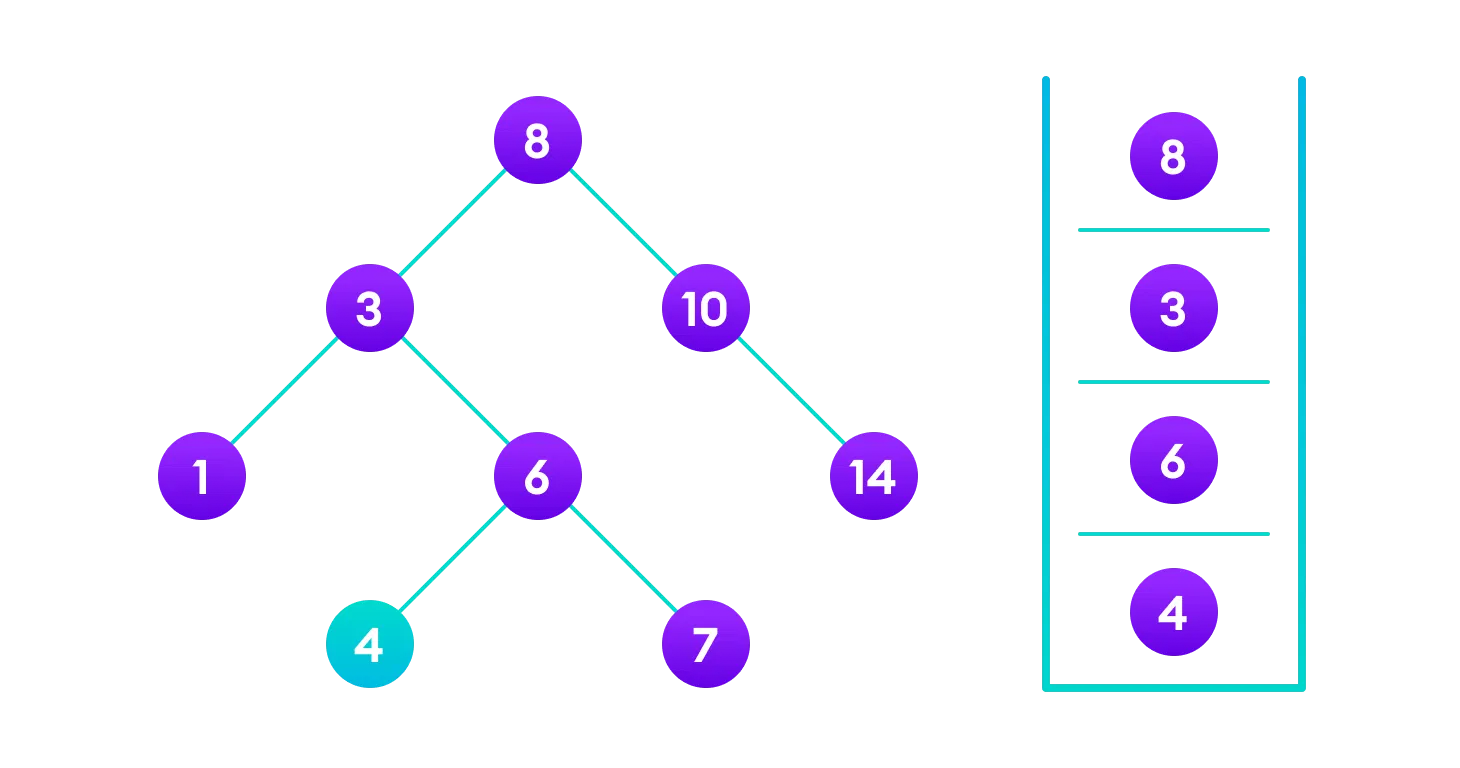
    - uzol "4" vlozeny ako lavy child uzla "6"


## 1.3) Delete

### 1) Case I
- uzol, ktory chceme odstranit je posledny "leaf" uzol, jednoducho ho odstranim

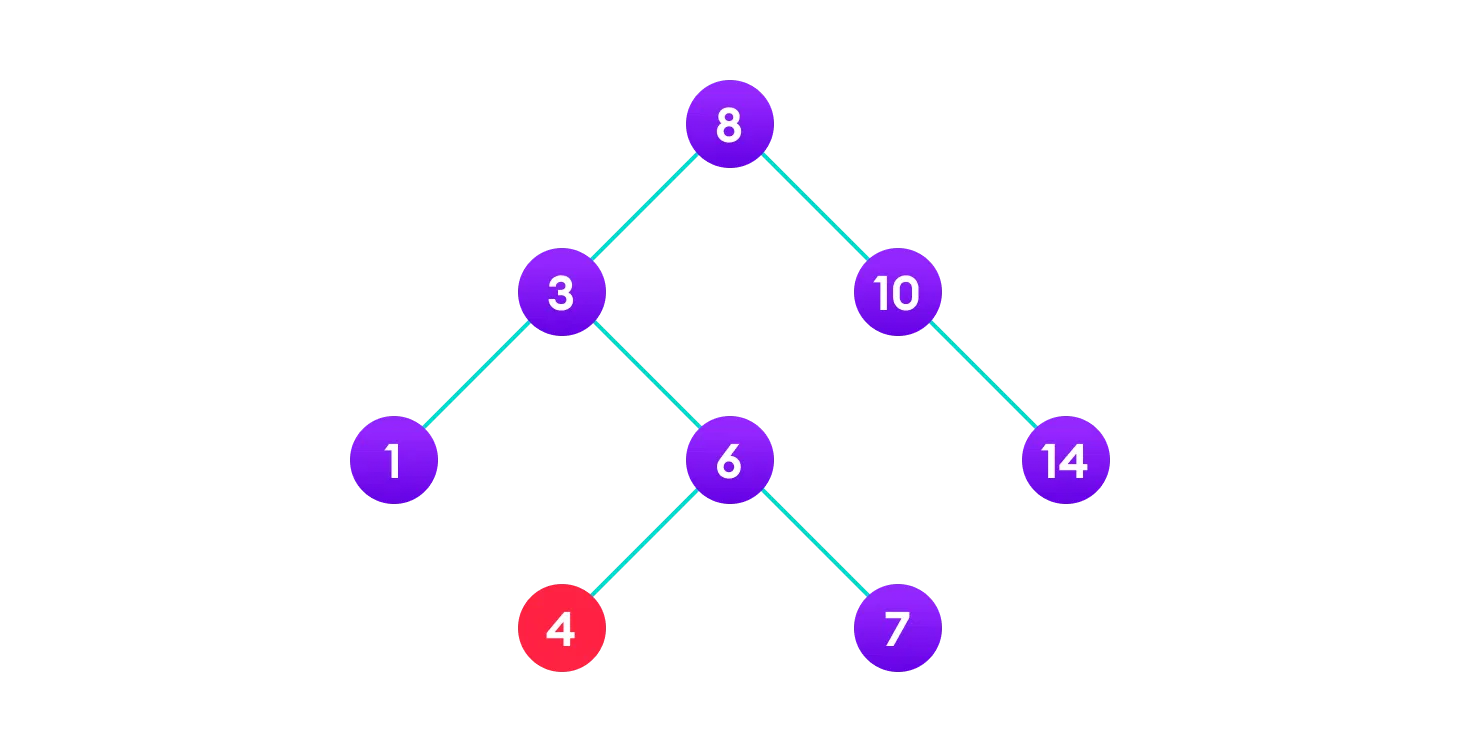
- uzol 4 chcem odstranit

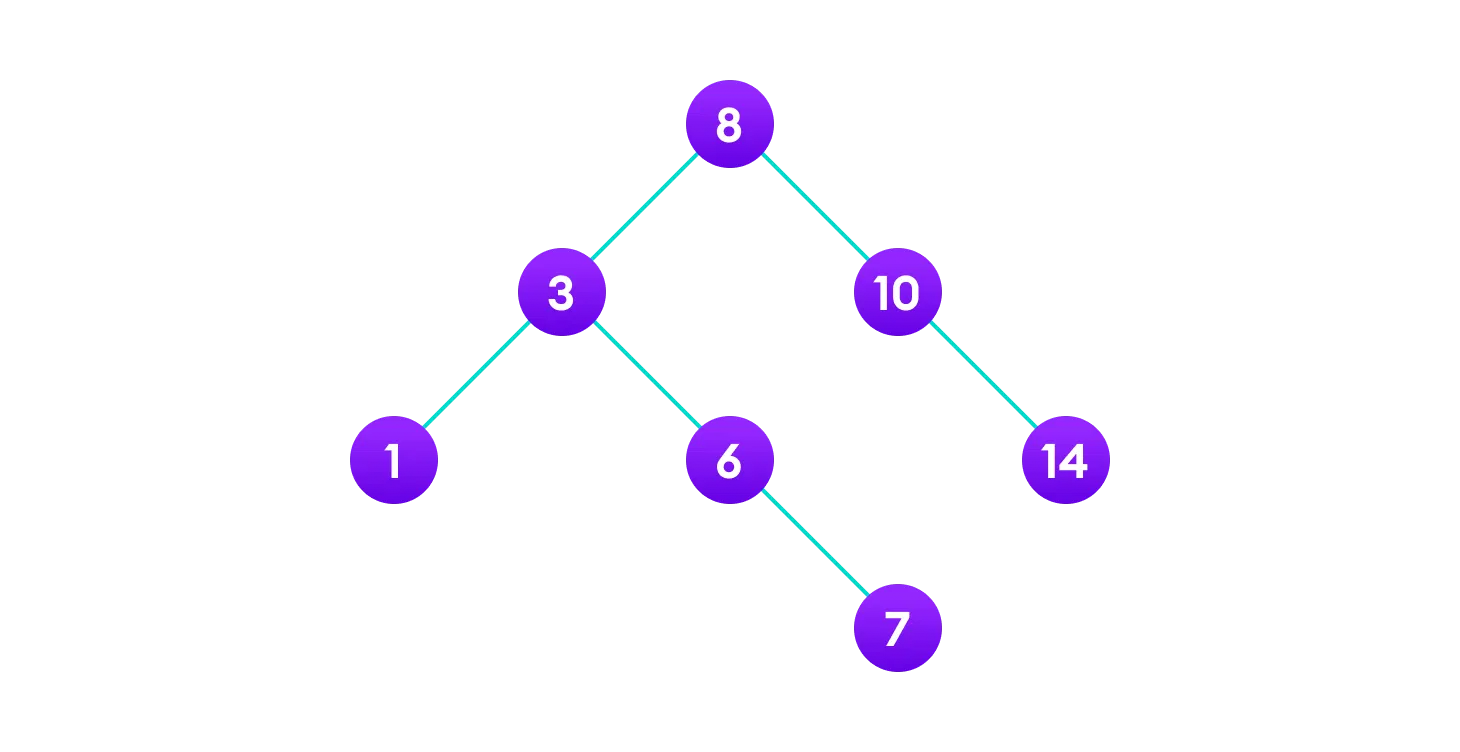
- uzol 4 som odstranil

### 2) Case II
- uzol na odstranenie ma **len jeden** child uzol
    - nahradim dany uzol jeho child uzlom
    - odstranim child uzol z jeho povodnej pozicie
    
    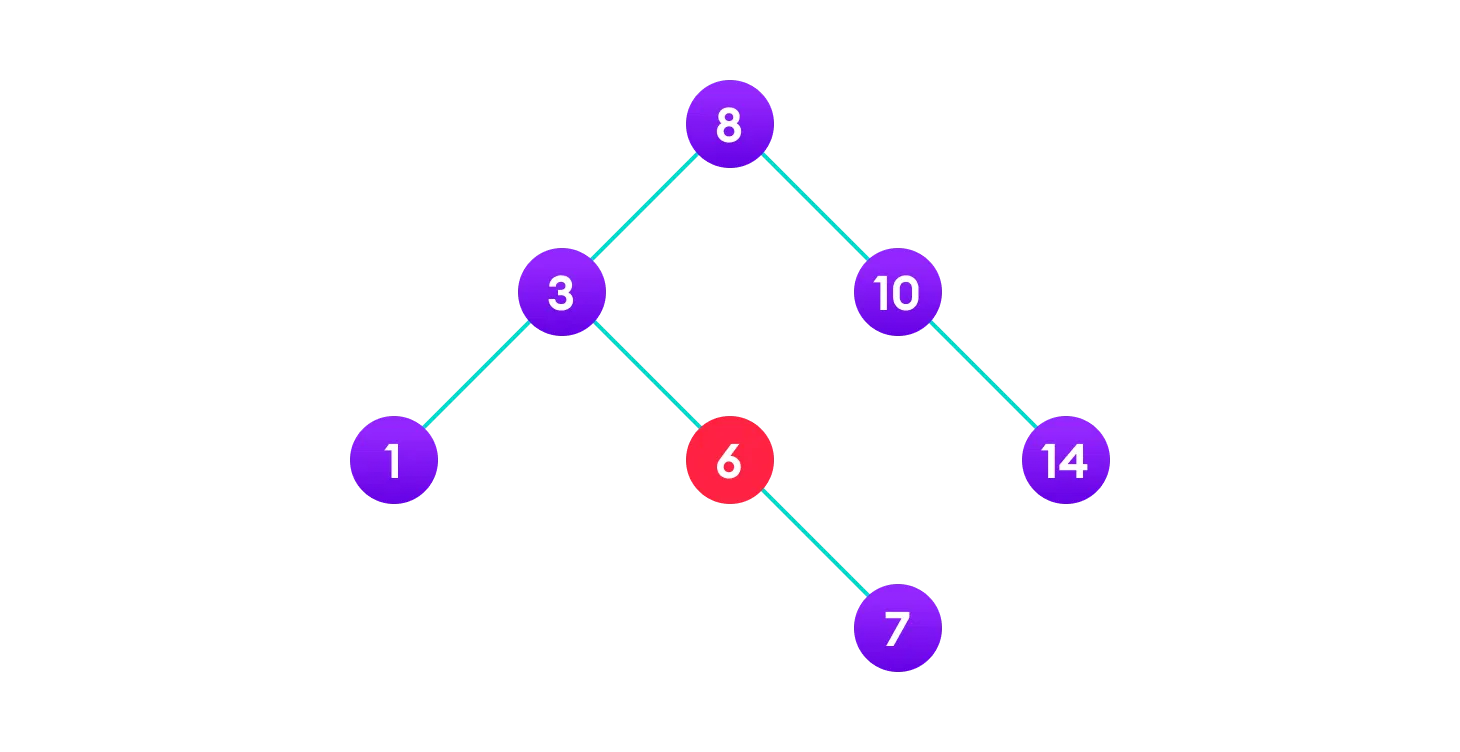
    - uzol 6 chcem odstranit
    
    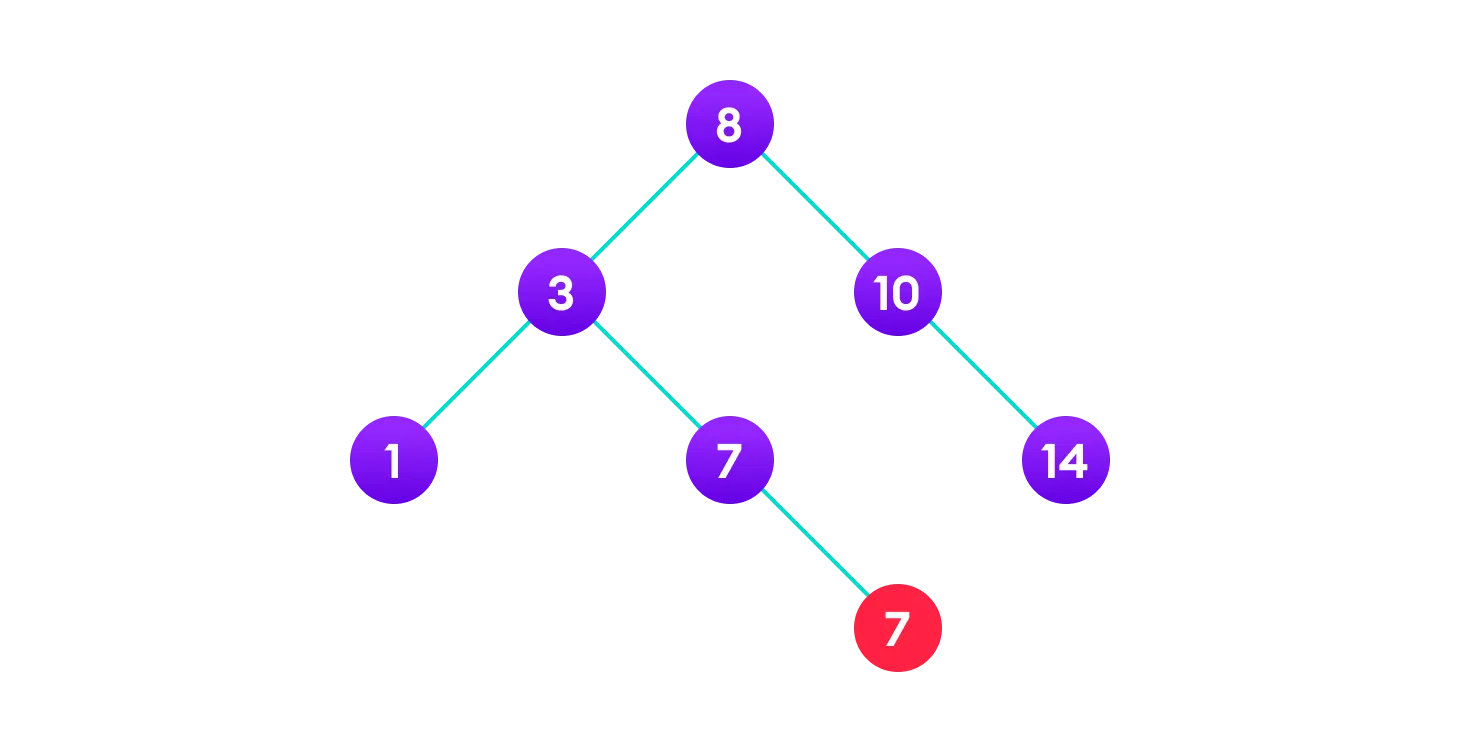
    - nahradim uzol 6 jeho child uzlom 7, odstranim uzol 7
    
    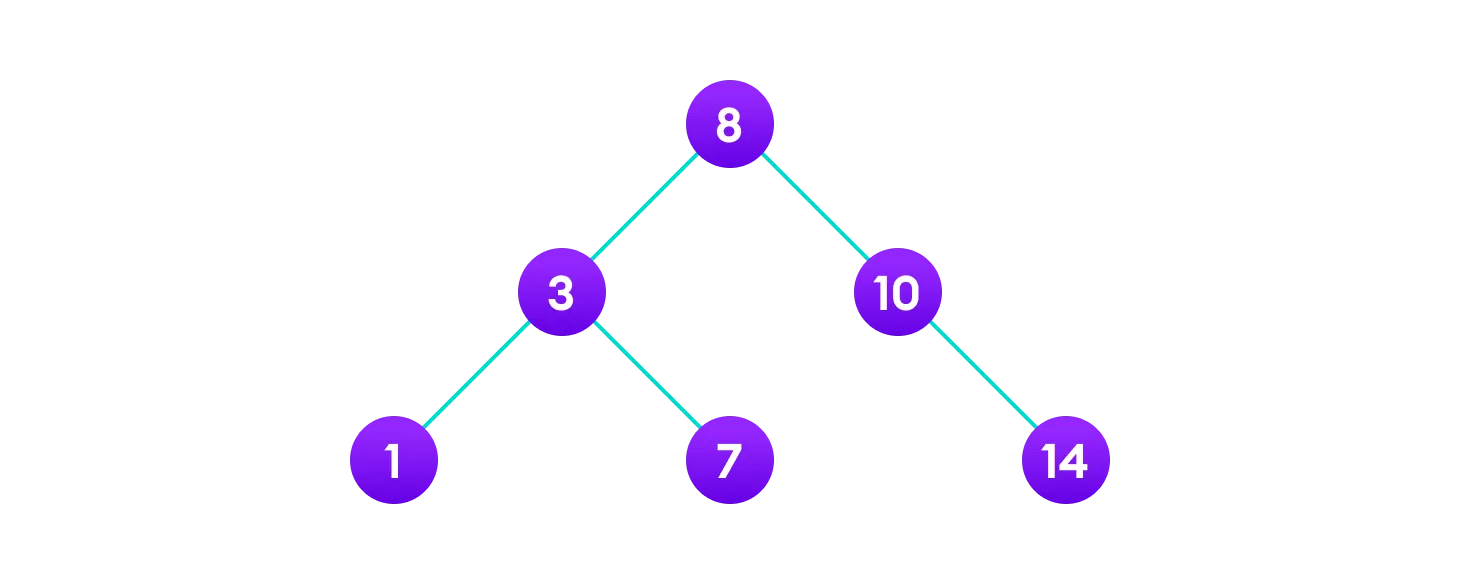
    - final po odstraneni uzla 6
    
### 3) Case III
- uzol na odstranenie ma **dva** child uzly:
    - ziskam "poradoveho" nasledovnika daneho uzlu (v podstate dalsie cislo v poradi)
    - nahradim dany uzol jeho nasledovnikom
    - odstarnim nasledovnika z jeho povodnej pozicie

    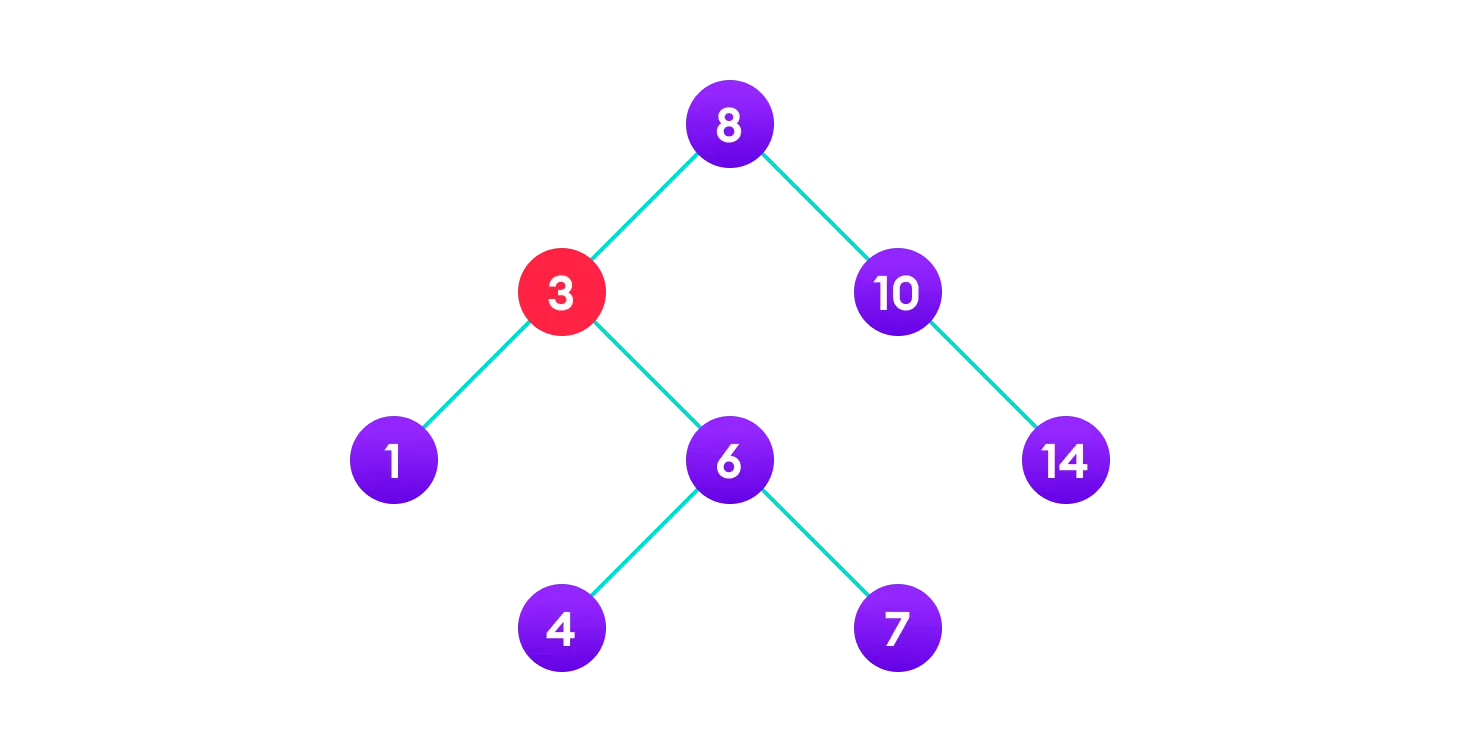
    - uzol 3 chem odstranit
    
    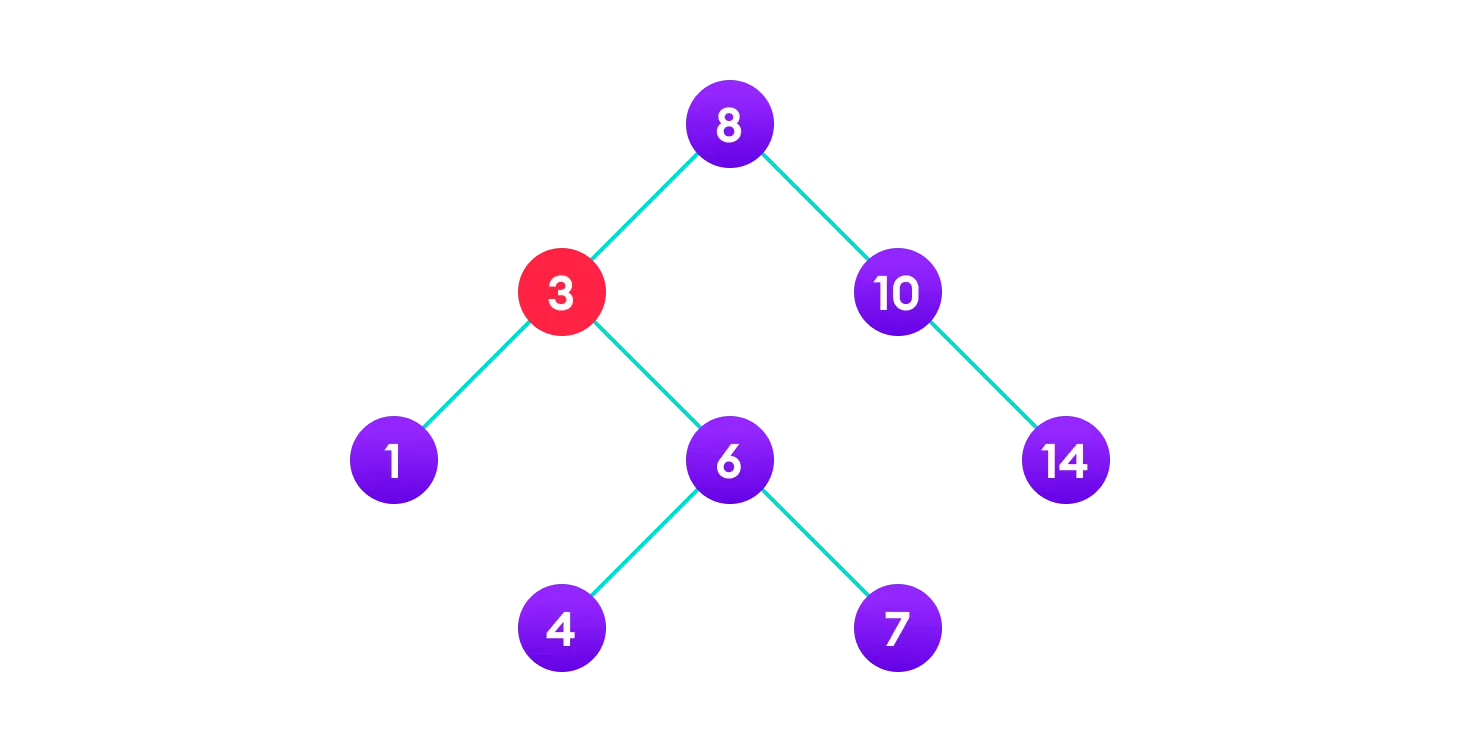
    - najdem jeho nasledovnika (uzol 4)

    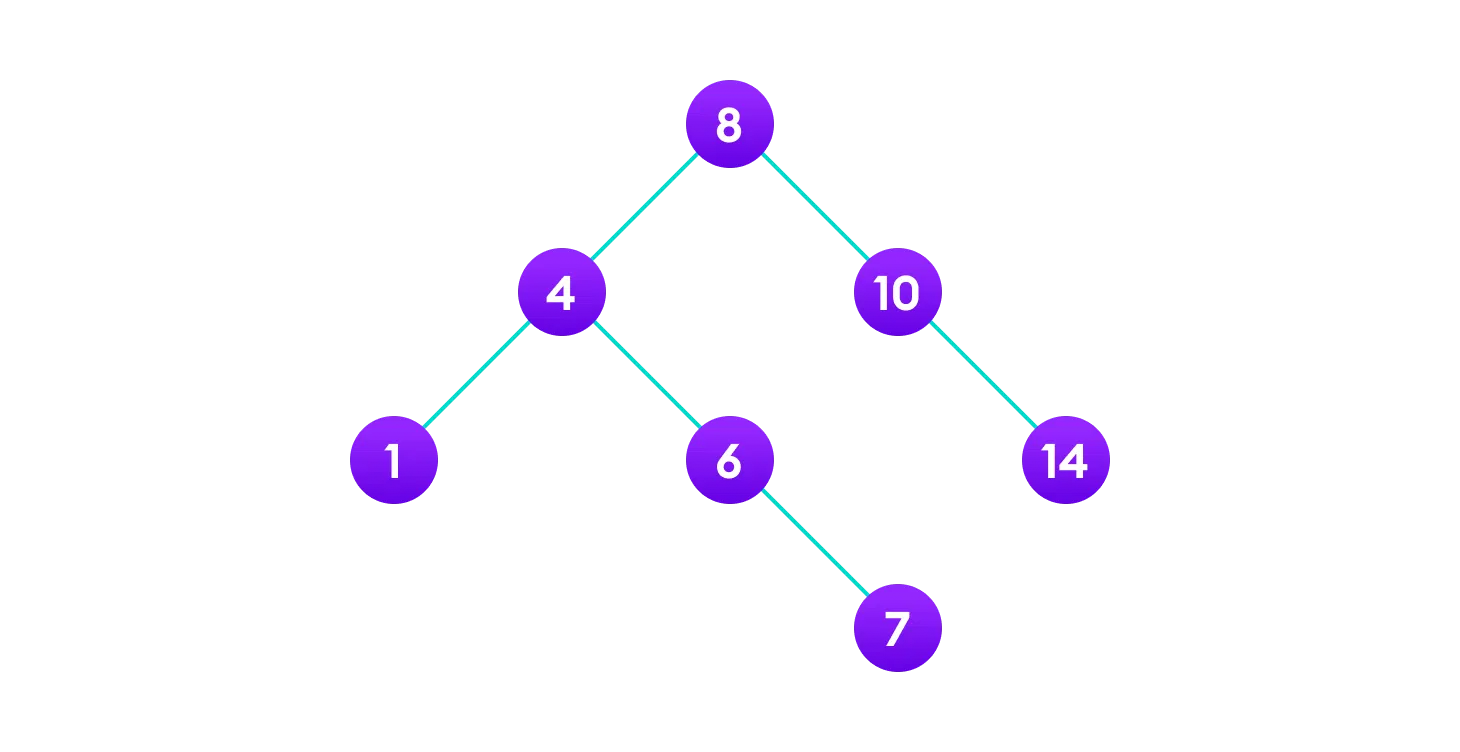
    - nahradim uzol 3 uzlom 4 a uzol 4 odstranim z povodnej pozicie






In [ ]:
# Binary search tree operations


# vytvorenie uzla
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


# inorder traversal
def inorder(root):
    if root is not None:
        # traverse left
        inorder(root.left)
        # root
        print(root.data, end=" ")
        # traverse right
        inorder(root.right)


# insertion
def insert(node, data):
    # return new node if tree is empty
    if node is None:
        return Node(data)
    if data < node.data:
        node.left = insert(node.left, data)
    else:
        node.right = insert(node.right, data)
    return node


# najdenie nasledovnika
def minValueNode(node):
    current = node

    # najdi posledny uzol najviac v lavo
    # find the leftmost leaf
    while current.left is not None:
        current = current.left

    return current


# deletion
def deletion(node, data):
    # ak je pradny strom vrat root uzol
    if node is None:
        return node

    # najdi uzol na zmazanie
    if data < node.data:
        node.left = deletion(node.left, data)
    elif data > node.data:
        node.right = deletion(node.right, data)
    else:
        # ak ma uzol iba 1 child uzol alebo ziaden
        if node.left is None:
            temp = node.right
            node = None
            return temp
        elif node.right is None:
            temp = node.left
            node = None
            return temp

        # ak uzol ma 2 child uzly
        # umiestni nasledovnika uzlu na jeho miesto
        temp = minValueNode(node.right)

        node.data = temp.data

        # odstranim nasledovnika
        node.right = deletion(node.right, temp.data)

    return node


# inicializacia
root = None
root = insert(root, 8)
root = insert(root, 3)
root = insert(root, 1)
root = insert(root, 6)
root = insert(root, 7)
root = insert(root, 10)
root = insert(root, 14)
root = insert(root, 4)

print("Inorder traversal: ", end=" ")
inorder(root)

print("\nDelete 10")
root = deletion(root, 10)
print("Inorder traversal: ", end=" ")
inorder(root)

Inorder traversal:  1 3 4 6 7 8 10 14 
Delete 10
Inorder traversal:  1 3 4 6 7 8 14 